In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from utils import load, table_pivot
from sklearn.preprocessing import MinMaxScaler

# PREPARACIÓN DE LOS DATOS

## Selección directorio

In [2]:
#Guardar directorio orginal
directorio_inicial = os.getcwd()

# Cambiar al directorio deseado
directorio_meta = "C:\\Users\\eagle\\Documents\\6. FORMACIÓN\\MASTER\\14MBID. TFM\\metaData"
directorio_miRNA = "C:\\Users\\eagle\\Documents\\6. FORMACIÓN\\MASTER\\14MBID. TFM\\miRNA_RPMadjLib"


## Load dataframes

In [3]:
# Carga el archivo en un DataFrame de pandas
nombre_archivo = 'metaData.txt'
os.chdir(directorio_meta)
df_meta = pd.read_csv(nombre_archivo, delimiter='\t', index_col='id')

#Cargo archivo 2 en DataFrame de pandas
nombre_archivo = 'miRNA_RPMadjLib.txt'
os.chdir(directorio_miRNA)
df_miRNA = pd.read_csv(nombre_archivo, delimiter='\t')
os.chdir(directorio_inicial)

In [4]:
df_meta.tail(2)

,SRP,PRJ,Organism,Sample,Runs,Instrument,Release,Sex,Fluid,Extraction,Library,Healthy,Cancer,Exosome,Desc,Experiment,Date
id,,,,,,,,,,,,,,,,,
498,SRP098894,PRJNA371423,Homo sapiens,SAMN06299042,SRR5230675,NextSeq 500,2017-10-16,female,serum,miRCURY,NEBNext,True,False,False,Control,SRX2539171,2017-10-16 00:00:00
499,SRP098894,PRJNA371423,Homo sapiens,SAMN06299041,SRR5230676,NextSeq 500,2017-10-16,female,serum,miRCURY,NEBNext,False,True,False,Serous,SRX2539172,2017-10-16 00:00:00


In [5]:
df_miRNA.tail(2)

,name,SRX258926,SRX258927,SRX258928,SRX258929,SRX258930,SRX258931,SRX258932,SRX258933,SRX258934,...,SRX1704766,SRX1704767,SRX1704768,SRX1704769,SRX1704770,SRX1704771,SRX1704772,SRX1704773,SRX1704774,SRX1704775
2417,hsa-miR-1304-3p,1.75,0.74,3.55,2.39,3.40,5.74,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,hsa-miR-384,304.96,427.79,18.43,19.37,37.41,34.43,261.44,132.59,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Transposición del dataframe df_miRNA

In [6]:
df_miRNA = df_miRNA.T.copy()
df_miRNA.columns = df_miRNA.loc['name']
df_miRNA.drop('name',inplace=True)

### Información dataframes

In [7]:
df_miRNA.tail(5)

name,hsa-miR-6850-3p,hsa-miR-4761-3p,hsa-miR-99b-3p,kshv-miR-K12-10a-3p,hsa-miR-3129-5p,ebv-miR-BART3-3p,hsa-miR-6820-5p,hsa-miR-4731-5p,hsa-miR-4423-3p,hsa-miR-136-5p,...,hsa-miR-4423-5p,hsa-miR-6512-5p,hsa-miR-6718-5p,hsa-miR-520h,hsa-miR-6796-5p,hsa-miR-1245b-5p,hsa-miR-5586-3p,hsa-miR-29a-5p,hsa-miR-1304-3p,hsa-miR-384
SRX1704771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRX1704772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRX1704773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRX1704774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRX1704775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_miRNA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1559 entries, SRX258926 to SRX1704775
Columns: 2419 entries, hsa-miR-6850-3p to hsa-miR-384
dtypes: object(2419)
memory usage: 28.8+ MB


In [9]:
df_miRNA.columns

Index(['hsa-miR-6850-3p', 'hsa-miR-4761-3p', 'hsa-miR-99b-3p',
       'kshv-miR-K12-10a-3p', 'hsa-miR-3129-5p', 'ebv-miR-BART3-3p',
       'hsa-miR-6820-5p', 'hsa-miR-4731-5p', 'hsa-miR-4423-3p',
       'hsa-miR-136-5p',
       ...
       'hsa-miR-4423-5p', 'hsa-miR-6512-5p', 'hsa-miR-6718-5p', 'hsa-miR-520h',
       'hsa-miR-6796-5p', 'hsa-miR-1245b-5p', 'hsa-miR-5586-3p',
       'hsa-miR-29a-5p', 'hsa-miR-1304-3p', 'hsa-miR-384'],
      dtype='object', name='name', length=2419)

---
---

In [10]:
df_meta.tail(1)

,SRP,PRJ,Organism,Sample,Runs,Instrument,Release,Sex,Fluid,Extraction,Library,Healthy,Cancer,Exosome,Desc,Experiment,Date
id,,,,,,,,,,,,,,,,,
499,SRP098894,PRJNA371423,Homo sapiens,SAMN06299041,SRR5230676,NextSeq 500,2017-10-16,female,serum,miRCURY,NEBNext,False,True,False,Serous,SRX2539172,2017-10-16 00:00:00


In [11]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SRP         499 non-null    object
 1   PRJ         499 non-null    object
 2   Organism    499 non-null    object
 3   Sample      499 non-null    object
 4   Runs        500 non-null    object
 5   Instrument  499 non-null    object
 6   Release     499 non-null    object
 7   Sex         486 non-null    object
 8   Fluid       500 non-null    object
 9   Extraction  421 non-null    object
 10  Library     421 non-null    object
 11  Healthy     486 non-null    object
 12  Cancer      499 non-null    object
 13  Exosome     500 non-null    bool  
 14  Desc        406 non-null    object
 15  Experiment  499 non-null    object
 16  Date        500 non-null    object
dtypes: bool(1), object(16)
memory usage: 66.9+ KB


In [12]:
df_meta.columns

Index(['SRP', 'PRJ', 'Organism', 'Sample', 'Runs', 'Instrument', 'Release',
       'Sex', 'Fluid', 'Extraction', 'Library', 'Healthy', 'Cancer', 'Exosome',
       'Desc', 'Experiment', 'Date'],
      dtype='object')

## Fusión dataframes

In [13]:
#Uno DataFrames
df_merged = pd.merge(df_meta, df_miRNA, left_on='Experiment', right_index=True, how='inner')
df_merged.reset_index(drop=True,inplace=True)

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 2436 entries, SRP to hsa-miR-384
dtypes: bool(1), object(2435)
memory usage: 9.3+ MB


In [15]:
df_merged.columns[:20]

Index(['SRP', 'PRJ', 'Organism', 'Sample', 'Runs', 'Instrument', 'Release',
       'Sex', 'Fluid', 'Extraction', 'Library', 'Healthy', 'Cancer', 'Exosome',
       'Desc', 'Experiment', 'Date', 'hsa-miR-6850-3p', 'hsa-miR-4761-3p',
       'hsa-miR-99b-3p'],
      dtype='object')

# Limpieza datos

In [16]:
for col in df_meta.columns:
    print(f'{col}: \n\tClases\Cantidad nulos: ({df_meta[col].nunique()}\{df_meta[col].isnull().sum()}) \n\t{df_meta[col].unique()[:50]}\n')

SRP: 
	Clases\Cantidad nulos: (9\1) 
	['SRP020486' 'SRP120169' 'SRP061240' 'SRP062587' 'SRP090716' 'SRP096110'
 'SRP041033' nan 'SRP029994' 'SRP098894']

PRJ: 
	Clases\Cantidad nulos: (9\1) 
	['PRJNA196121' 'PRJNA414616' 'PRJNA290097' 'PRJNA293274' 'PRJNA345068'
 'PRJNA360237' 'PRJNA244080' nan 'PRJNA219428' 'PRJNA371423']

Organism: 
	Clases\Cantidad nulos: (1\1) 
	['Homo sapiens' nan]

Sample: 
	Clases\Cantidad nulos: (498\1) 
	['SAMN01997249' 'SAMN01997250' 'SAMN01997251' 'SAMN01997252'
 'SAMN01997253' 'SAMN01997254' 'SAMN01997255' 'SAMN01997256'
 'SAMN01997257' 'SAMN01997258' 'SAMN01997259' 'SAMN01997260'
 'SAMN01997261' 'SAMN01997262' 'SAMN07795855' 'SAMN07795854'
 'SAMN07795853' 'SAMN07795852' 'SAMN07795851' 'SAMN07795850'
 'SAMN07795849' 'SAMN07795848' 'SAMN07795847' 'SAMN07795846'
 'SAMN07795845' 'SAMN07795844' 'SAMN07795843' 'SAMN07795841'
 'SAMN07795842' 'SAMN07795840' 'SAMN07795893' 'SAMN07795892'
 'SAMN07795891' 'SAMN07795890' 'SAMN07795889' 'SAMN07795888'
 'SAMN07795887' '

## Elimino variables por relación con variable objetivo

In [17]:
print('Mantengo Sample para identificar las muestras por si necesitara recurrir a su consulta')

Mantengo Sample para identificar las muestras por si necesitara recurrir a su consulta


In [18]:
df_merged.drop(['SRP','PRJ','Runs','Date', 'Experiment', 'Release','Organism', 'Healthy'],axis=1,inplace=True)
#['SRP','PRJ','Sample','Runs','Date', 'Experiment', 'Release','Organism', 'Healthy']

## Variabilidad 1 valor

In [19]:
#Quito aquello en los que solo existe un valor posible
lista_remove = []
for col in df_merged.columns:
    if df_merged[col].nunique()==1:
        lista_remove.append(col)
        #print(f'{col} eliminada del dataset')
        df_merged.drop(col,axis=1, inplace=True)
print(f'{len(lista_remove)} feature eliminadas')

473 feature eliminadas


In [20]:
diccionario = {}
for col in df_merged.columns:
    value = df_merged[col].nunique()
    #print(col, value)
    diccionario[col] = value

In [21]:
diccionario_sort = dict(sorted(diccionario.items(), key=lambda items:items[1], reverse=True))
#diccionario_sort

**Valores variables**

In [22]:
df_merged.columns

Index(['Sample', 'Instrument', 'Sex', 'Fluid', 'Extraction', 'Library',
       'Cancer', 'Exosome', 'Desc', 'hsa-miR-6850-3p',
       ...
       'hsa-miR-2467-3p', 'hsa-miR-6512-5p', 'hsa-miR-6718-5p', 'hsa-miR-520h',
       'hsa-miR-6796-5p', 'hsa-miR-1245b-5p', 'hsa-miR-5586-3p',
       'hsa-miR-29a-5p', 'hsa-miR-1304-3p', 'hsa-miR-384'],
      dtype='object', length=1955)

In [23]:
for col in df_merged.columns[:8]:
    print(f'{col}: \n\tClases\Cantidad nulos: ({df_merged[col].nunique()}\{df_merged[col].isnull().sum()}) \n\t{df_merged[col].unique()[:50]}\n')

Sample: 
	Clases\Cantidad nulos: (498\0) 
	['SAMN01997249' 'SAMN01997250' 'SAMN01997251' 'SAMN01997252'
 'SAMN01997253' 'SAMN01997254' 'SAMN01997255' 'SAMN01997256'
 'SAMN01997257' 'SAMN01997258' 'SAMN01997259' 'SAMN01997260'
 'SAMN01997261' 'SAMN01997262' 'SAMN07795855' 'SAMN07795854'
 'SAMN07795853' 'SAMN07795852' 'SAMN07795851' 'SAMN07795850'
 'SAMN07795849' 'SAMN07795848' 'SAMN07795847' 'SAMN07795846'
 'SAMN07795845' 'SAMN07795844' 'SAMN07795843' 'SAMN07795841'
 'SAMN07795842' 'SAMN07795840' 'SAMN07795893' 'SAMN07795892'
 'SAMN07795891' 'SAMN07795890' 'SAMN07795889' 'SAMN07795888'
 'SAMN07795887' 'SAMN07795886' 'SAMN07795885' 'SAMN07795884'
 'SAMN07795883' 'SAMN07795882' 'SAMN07795881' 'SAMN07795880'
 'SAMN07795879' 'SAMN07795878' 'SAMN07795877' 'SAMN07795876'
 'SAMN07795875' 'SAMN07795874']

Instrument: 
	Clases\Cantidad nulos: (6\0) 
	['Illumina HiSeq 2000' 'Illumina HiScanSQ' 'Illumina Genome Analyzer'
 'Illumina Genome Analyzer IIx' 'Illumina HiSeq 2500' 'NextSeq 500']

Sex: 
	

## Valores nulos

In [24]:
#Variables con valores nulos
df_merged.columns[df_merged.isnull().sum()>0]

Index(['Sex', 'Extraction', 'Library', 'Desc'], dtype='object')

In [25]:
#Variables con valores nulos
df_merged.isnull().sum()[df_merged.isnull().sum()>0]

Sex           14
Extraction    79
Library       79
Desc          93
dtype: int64

**_Desc_**

In [26]:
#Completo los valores nulos como 'nan' en Desc
df_merged['Desc'].fillna('nan', inplace=True)

In [27]:
def frequences(df_merged, lista, file):
    #print(df_merged[lista[0]].value_counts())
    datafr = pd.pivot_table(df_merged[lista], index=lista[0],columns=lista[1:],aggfunc=len, fill_value=0)
    valor = datafr.describe().loc['std']
    print(f'Desviación de {valor}')
    
    plt.figure(figsize=(7, 7))
    sns.heatmap(datafr, annot=True, mask=datafr==0)
    plt.savefig(f'{file}', bbox_inches='tight')
    plt.show()

Desviación de Cancer
False    13.542085
True     16.257984
Name: std, dtype: float64


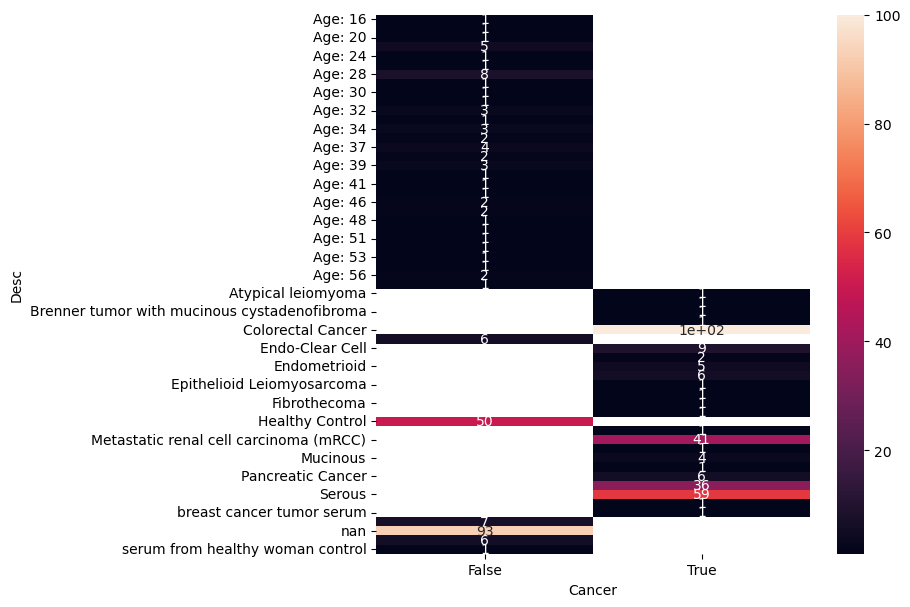

In [28]:
lista = ['Desc','Cancer']
file = './figures/preparacion/grupo_Desc_Cancer.png'
frequences(df_merged, lista, file)

Desviación de Cancer  Fluid      
False   plasma          6.767924
        serum           0.789691
        urine           5.077368
        urine cells     5.207556
True    plasma         14.648402
        serum           7.760666
Name: std, dtype: float64


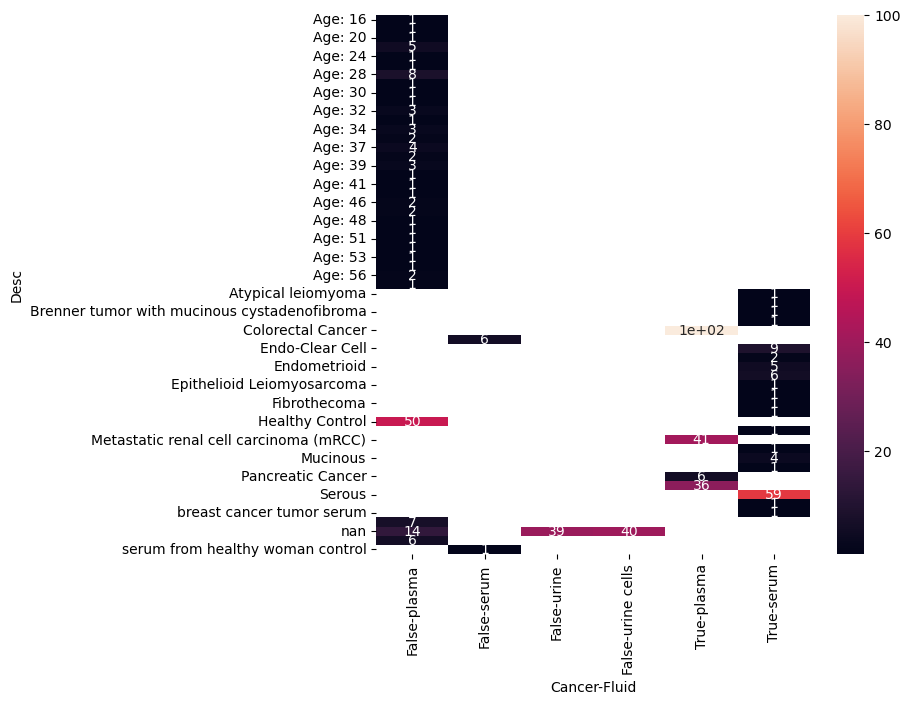

In [29]:
lista=['Desc','Cancer', 'Fluid']
file = './figures/preparacion/grupo_Desc_Cancer_Fluid.png'
frequences(df_merged, lista, file)

In [30]:
# No tengo en cuenta el fluido de urine y urine cells pues no presentan datos de presencia de cáncer
df_merged = df_merged[(df_merged.Fluid != 'urine') & (df_merged.Fluid != 'urine cells')].copy()

In [31]:
df_merged['Desc'].replace( 'nan', 'Healthy Control',inplace=True)

In [32]:
#Sustituyo por otros valores los que no aportan nada
df_merged['Desc'].replace(['Age: 26', 'Age: 32', 'Age: 68', 'Age: 48', 'Age: 39',
       'Age: 56', 'Age: 38', 'Age: 46', 'Age: 28', 'Age: 34', 'Age: 35',
       'Age: 41', 'Age: 49', 'Age: 47', 'Age: 37', 'Age: 52', 'Age: 21',
       'Age: 19', 'Age: 29', 'Age: 24', 'Age: 33', 'Age: 53', 'Age: 44',
       'Age: 30', 'Age: 40', 'Age: 54', 'Age: 51', 'Age: 20', 'Age: 16',
       'Age: 31'], 'Healthy Control',inplace=True)

In [33]:
df_merged.Desc.unique()

array(['Healthy Control', 'Colorectal Cancer', 'Prostate Cancer',
       'Pancreatic Cancer', 'Metastatic renal cell carcinoma (mRCC)',
       'breast cancer tumor serum', 'serum from healthy woman control',
       'chronic fatigue syndrome', 'non-fatigued', 'Serous',
       'Granulosa Cell', 'Myxoid Leiomyosarcoma', 'Mucinous',
       'Mixed Mullerian adenofibroma', 'Epithelioid Leiomyosarcoma',
       'Endometrioid', 'Endometrial Adenocarcinoma', 'Fibroma',
       'Leiomyoma', 'Simple cyst', 'Fibrothecoma',
       'Brenner tumor with mucinous cystadenofibroma',
       'Atypical leiomyoma', 'Brenner tumor', 'Clear cell', 'Control',
       'Endometrioma', 'Endo-Clear Cell'], dtype=object)

In [34]:
#Variables con valores nulos
df_merged.isnull().sum()[df_merged.isnull().sum()>0]

Sex    14
dtype: int64

**_Sex_**

In [35]:
#Completo los valores nulos como 'nan' en Desc
df_merged['Sex'].fillna('nan', inplace=True)

Desviación de Sex
female    58.689863
male      51.618795
nan        9.899495
Name: std, dtype: float64


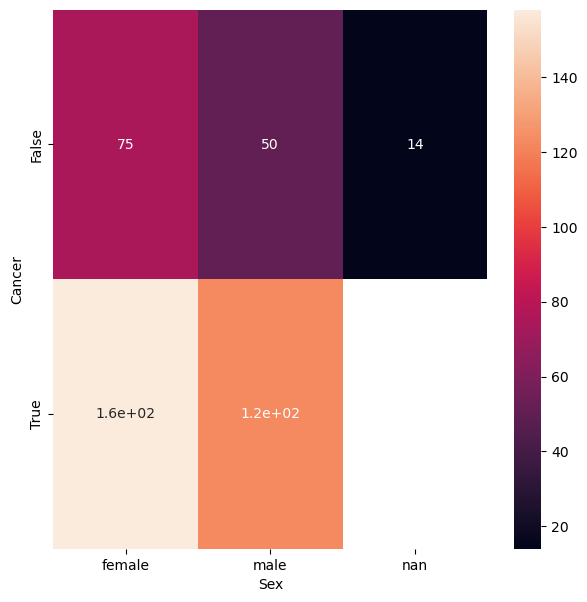

In [36]:
lista = ['Cancer','Sex']
file = './figures/preparacion/grupo_Cancer_Sex.png'
frequences(df_merged, lista, file)

Desviación de Sex     Fluid 
female  plasma     5.656854
        serum     64.346717
male    plasma    51.618795
nan     plasma     9.899495
Name: std, dtype: float64


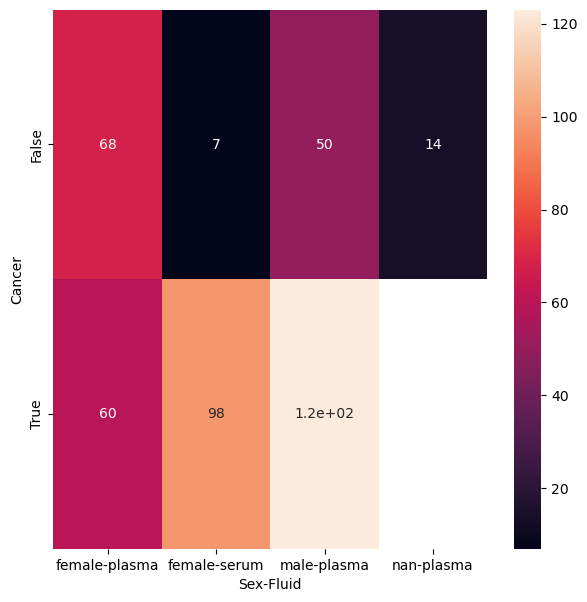

In [37]:
lista = ['Cancer','Sex', 'Fluid']
file = './figures/preparacion/grupo_Cancer_Sex_Fluid.png'
frequences(df_merged, lista, file)

In [38]:
# Para balancear los datos entre presencia y ausencia de cáncer para el flluido plasma
df_merged['Sex'].replace( 'nan', 'male',inplace=True)

Desviación de Sex     Fluid 
female  plasma     5.656854
        serum     64.346717
male    plasma    41.719300
Name: std, dtype: float64


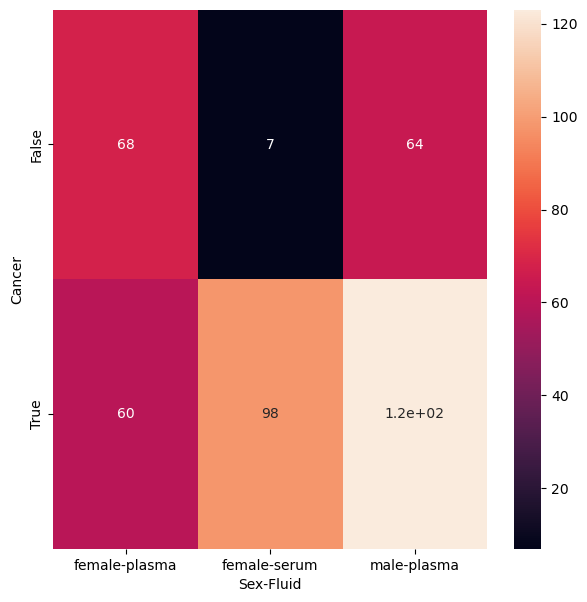

In [39]:
lista = ['Cancer','Sex', 'Fluid']
file = './figures/preparacion/grupo_Cancer_Sex_Fluid2.png'
frequences(df_merged, lista, file)

## Frecuencias de ocurrencia en cada combinación de variables

In [40]:
from itertools import combinations
import itertools
lista = ['Instrument','Extraction', 'Library', 'Fluid']

#combinacion=list(combinations(lista,2))
# Obtener todas las combinaciones posibles sin especificar el tamaño
combinacion = list(itertools.chain.from_iterable(itertools.combinations(lista, r) for r in range(1,3))) #len(lista) + 1

In [41]:
combinacion

[('Instrument',),
 ('Extraction',),
 ('Library',),
 ('Fluid',),
 ('Instrument', 'Extraction'),
 ('Instrument', 'Library'),
 ('Instrument', 'Fluid'),
 ('Extraction', 'Library'),
 ('Extraction', 'Fluid'),
 ('Library', 'Fluid')]

Desviación de ('Instrument',): 43.36921591277491 
Instrument
Illumina Genome Analyzer    65.053824
Illumina HiSeq 2000          0.707107
NextSeq 500                 64.346717
Name: std, dtype: float64



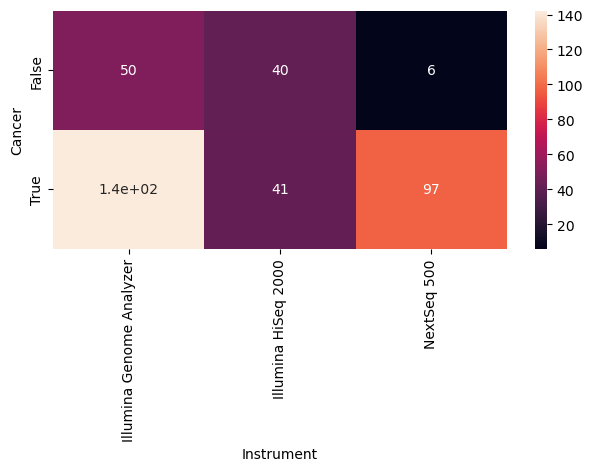

Desviación de ('Extraction',): 50.204581464244875 
Extraction
miRCURY     55.154329
miRNeasy    45.254834
Name: std, dtype: float64



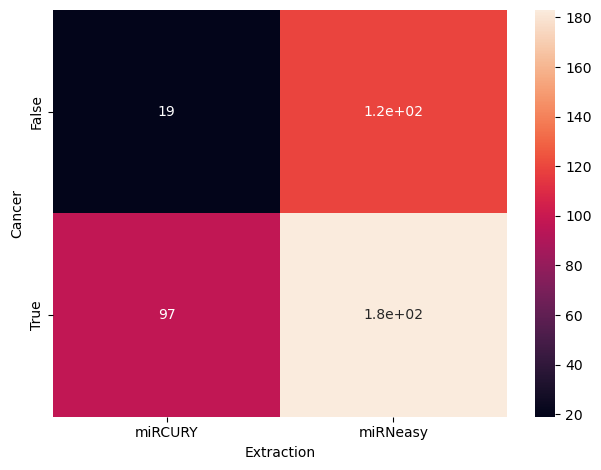

Desviación de ('Library',): 115.25840533340725 
Library
NEBNext    115.258405
Name: std, dtype: float64



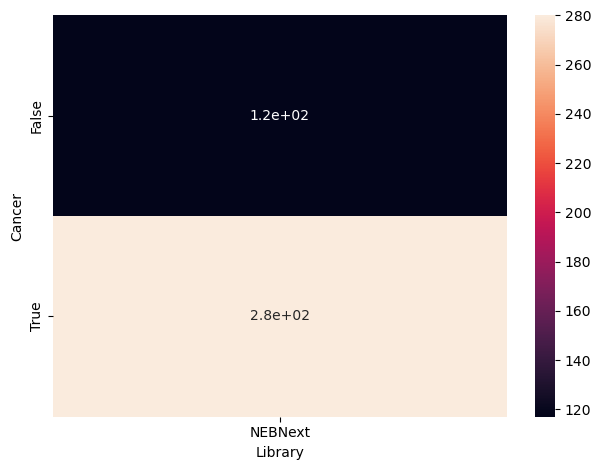

Desviación de ('Fluid',): 50.20458146424487 
Fluid
plasma    36.062446
serum     64.346717
Name: std, dtype: float64



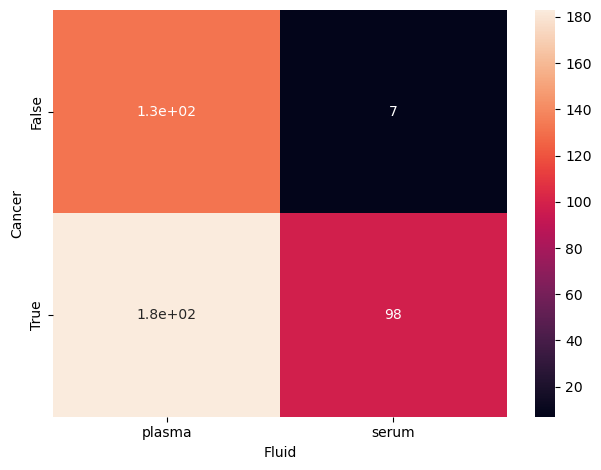

Desviación de ('Instrument', 'Extraction'): 46.43334529791662 
Instrument                Extraction
Illumina Genome Analyzer  miRNeasy      65.053824
Illumina HiSeq 2000       miRNeasy       9.899495
NextSeq 500               miRCURY       64.346717
Name: std, dtype: float64



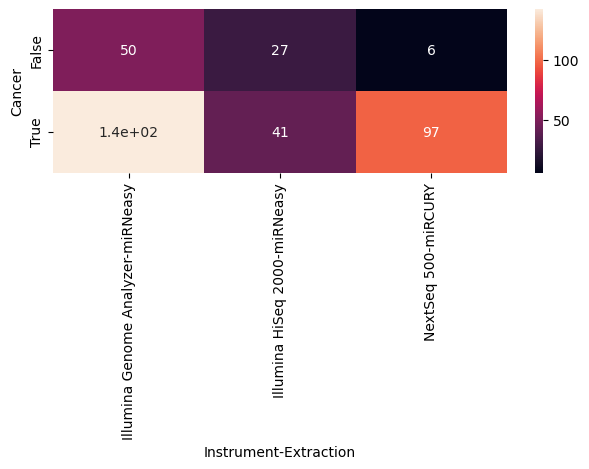

Desviación de ('Instrument', 'Library'): 48.31896338108074 
Instrument                Library
Illumina Genome Analyzer  NEBNext    65.053824
Illumina HiSeq 2000       NEBNext    15.556349
NextSeq 500               NEBNext    64.346717
Name: std, dtype: float64



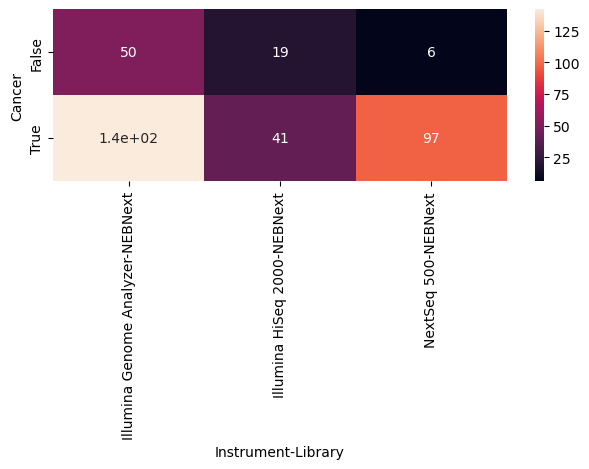

Desviación de ('Instrument', 'Fluid'): 43.36921591277491 
Instrument                Fluid 
Illumina Genome Analyzer  plasma    65.053824
Illumina HiSeq 2000       plasma     0.707107
NextSeq 500               serum     64.346717
Name: std, dtype: float64



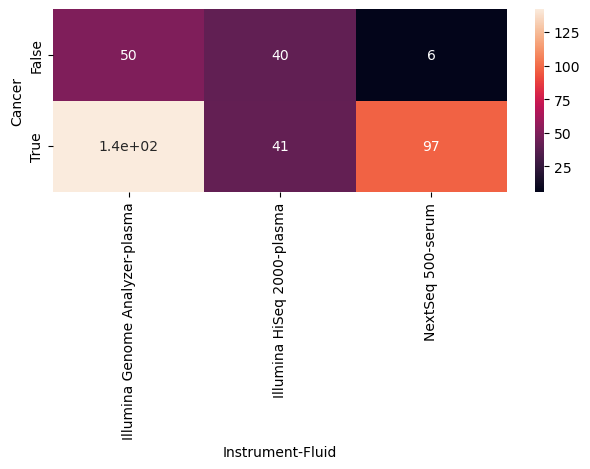

Desviación de ('Extraction', 'Library'): 57.62920266670362 
Extraction  Library
miRCURY     NEBNext    55.154329
miRNeasy    NEBNext    60.104076
Name: std, dtype: float64



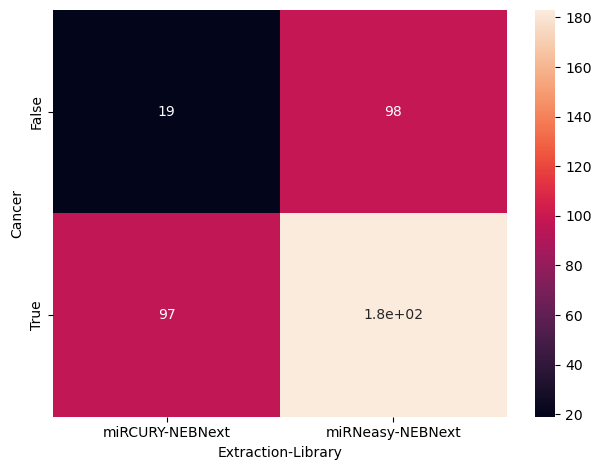

Desviación de ('Extraction', 'Fluid'): 54.800775541957435 
Extraction  Fluid 
miRCURY     serum     64.346717
miRNeasy    plasma    45.254834
Name: std, dtype: float64



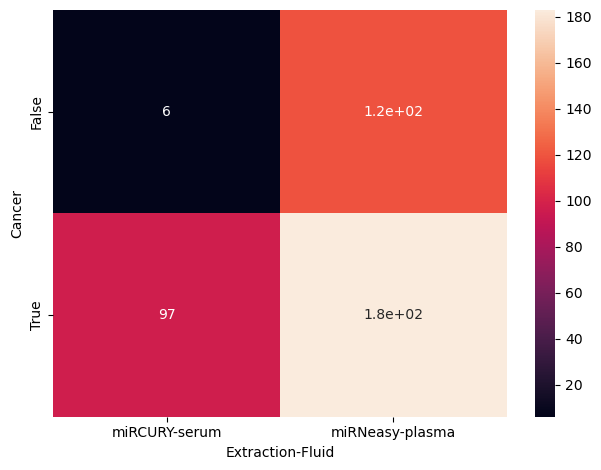

Desviación de ('Library', 'Fluid'): 57.62920266670362 
Library  Fluid 
NEBNext  plasma    50.911688
         serum     64.346717
Name: std, dtype: float64



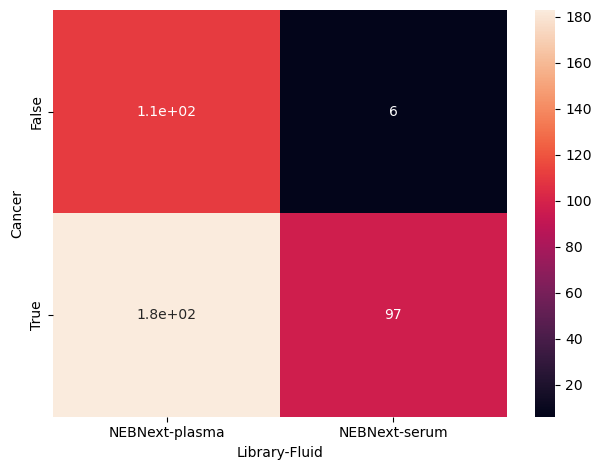

In [45]:
filtro=combinacion

desviaciones = []
# Crear una figura con 3 subplots en una fila
filas = 1
#fig, axes = plt.subplots(filas, int(len(filtro)/filas), figsize=(20, 8), sharey=True)
#axes = axes.flatten()
# Iterar sobre cada característica y cada eje de subplot
for i, feature in enumerate(filtro):
    lista=['Cancer']
    lista.extend(list(feature))
    datafr = pd.pivot_table(df_merged[lista], index=lista[0], columns=lista[1:], aggfunc=len, fill_value=0)
    columnas=[col for col in datafr.columns if datafr.loc[True,(col)]>1]
    datafr=datafr[columnas].copy()
    # Crear el heatmap en el subplot correspondiente
    sns.heatmap(datafr, annot=True, mask=datafr == 0)

    valor=datafr.describe().loc['std']

    desviaciones.append({
        'Feature': feature,
        'Desviación media': valor.mean(),
        'Divisiones': len(valor),
        'Valores por columnas': list(valor.index)
    })

    print(f'Desviación de {feature}: {valor.mean()} \n{valor}\n')
    
    # Mostrar la figura completa con los 3 heatmaps
    plt.savefig(f'./figures/preparacion/grupo_combinado_{feature}.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()



In [42]:
# Filtrar las tuplas que contienen el valor específico
filtro = [tupla for tupla in combinacion if 'Fluid' in tupla]
filtro

[('Fluid',),
 ('Instrument', 'Fluid'),
 ('Extraction', 'Fluid'),
 ('Library', 'Fluid')]

Desviación de ('Fluid',): 50.20458146424487 
Fluid
plasma    36.062446
serum     64.346717
Name: std, dtype: float64

Desviación de ('Instrument', 'Fluid'): 43.36921591277491 
Instrument                Fluid 
Illumina Genome Analyzer  plasma    65.053824
Illumina HiSeq 2000       plasma     0.707107
NextSeq 500               serum     64.346717
Name: std, dtype: float64

Desviación de ('Extraction', 'Fluid'): 54.800775541957435 
Extraction  Fluid 
miRCURY     serum     64.346717
miRNeasy    plasma    45.254834
Name: std, dtype: float64

Desviación de ('Library', 'Fluid'): 57.62920266670362 
Library  Fluid 
NEBNext  plasma    50.911688
         serum     64.346717
Name: std, dtype: float64



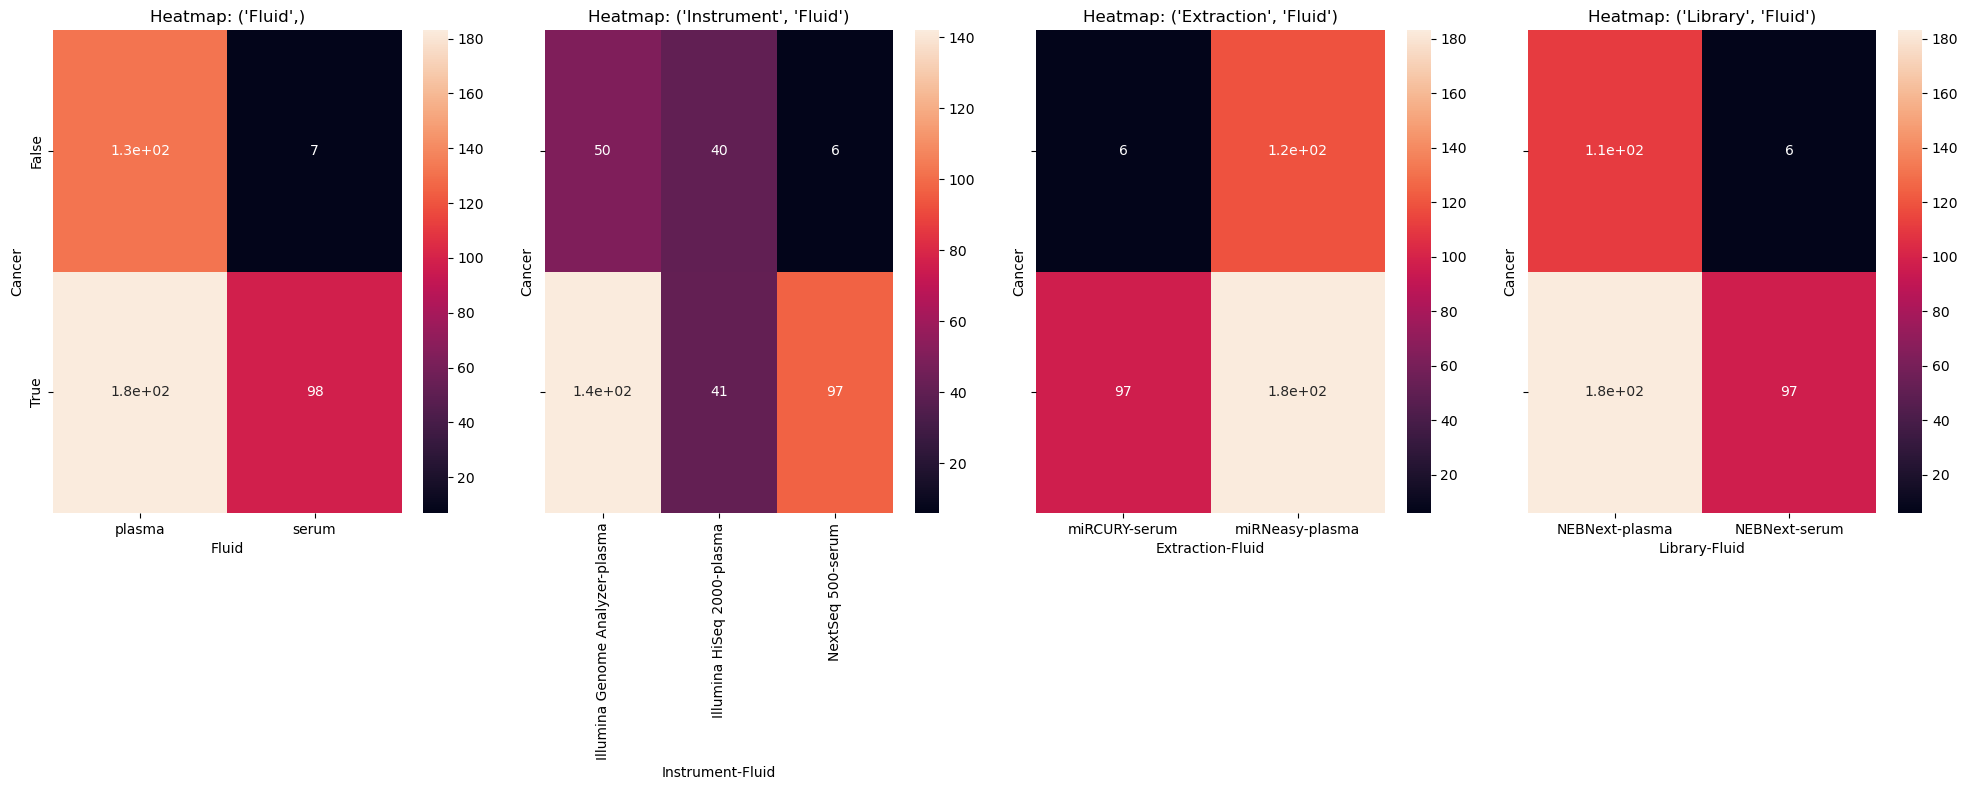

In [43]:
#filtro=combinacion

desviaciones = []
# Crear una figura con 3 subplots en una fila
filas = 1
fig, axes = plt.subplots(filas, int(len(filtro)/filas), figsize=(20, 8), sharey=True)
axes = axes.flatten()
# Iterar sobre cada característica y cada eje de subplot
for i, feature in enumerate(filtro):
    lista=['Cancer']
    lista.extend(list(feature))
    datafr = pd.pivot_table(df_merged[lista], index=lista[0], columns=lista[1:], aggfunc=len, fill_value=0)
    columnas=[col for col in datafr.columns if datafr.loc[True,(col)]>1]
    datafr=datafr[columnas].copy()
    # Crear el heatmap en el subplot correspondiente
    sns.heatmap(datafr, annot=True, mask=datafr == 0, ax=axes[i])
    axes[i].set_title(f'Heatmap: {feature}')

    valor=datafr.describe().loc['std']

    desviaciones.append({
        'Feature': feature,
        'Desviación media': valor.mean(),
        'Divisiones': len(valor),
        'Valores por columnas': list(valor.index)
    })

    print(f'Desviación de {feature}: {valor.mean()} \n{valor}\n')

# Mostrar la figura completa con los 3 heatmaps
plt.savefig(f'./figures/preparacion/grupo_combinado.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [44]:
resumen=pd.DataFrame(desviaciones).sort_values(by=(['Desviación media'])).reset_index(drop=True)
resumen

,Feature,Desviación media,Divisiones,Valores por columnas
0,"(Instrument, Fluid)",43.369216,3,"[(Illumina Genome Analyzer, plasma), (Illumina..."
1,"(Fluid,)",50.204581,2,"[plasma, serum]"
2,"(Extraction, Fluid)",54.800776,2,"[(miRCURY, serum), (miRNeasy, plasma)]"
3,"(Library, Fluid)",57.629203,2,"[(NEBNext, plasma), (NEBNext, serum)]"


## Segmenentación de datasets

In [45]:
valores_filtrados = list(resumen['Valores por columnas'][0])
valores_filtrados

[('Illumina Genome Analyzer', 'plasma'),
 ('Illumina HiSeq 2000', 'plasma'),
 ('NextSeq 500', 'serum')]

**Estudio distribución tipos de cancer**

Desviación de Desc
Atypical leiomyoma                               0.447214
Brenner tumor                                    0.447214
Brenner tumor with mucinous cystadenofibroma     0.447214
Clear cell                                       0.447214
Colorectal Cancer                               44.721360
Control                                          2.683282
Endo-Clear Cell                                  4.024922
Endometrial Adenocarcinoma                       0.894427
Endometrioid                                     2.236068
Endometrioma                                     2.683282
Epithelioid Leiomyosarcoma                       0.447214
Fibroma                                          0.447214
Fibrothecoma                                     0.447214
Granulosa Cell                                   0.447214
Healthy Control                                 23.242203
Leiomyoma                                        0.447214
Metastatic renal cell carcinoma (mRCC)          18.33

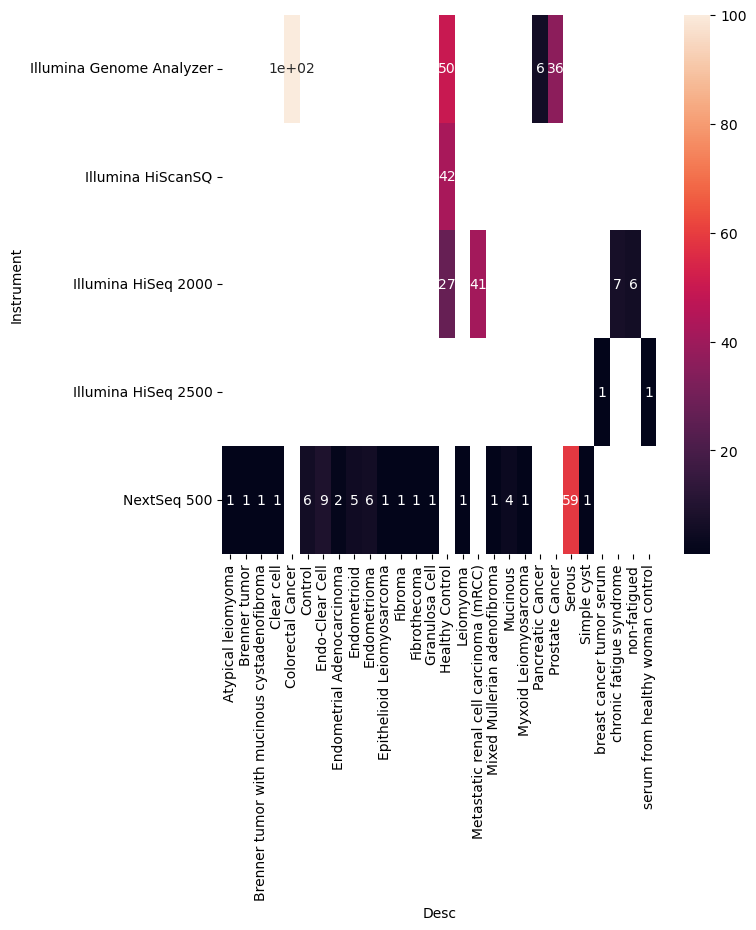

In [46]:
lista=['Instrument', 'Desc']
file = './figures/preparacion/grupo_Desc_Instrument.png'
frequences(df_merged, lista, file)

In [47]:
print ('Como sólo tengo por cada tipo de cáncer un instrumento con el que se mide, no puedo comprobar diferencias entre un instrumento y otro.')
print('Decido por lo tanto quitar la variable Instrument.')

Como sólo tengo por cada tipo de cáncer un instrumento con el que se mide, no puedo comprobar diferencias entre un instrumento y otro.
Decido por lo tanto quitar la variable Instrument.


**Elimino variables Extraction y Library**

In [48]:
df_merged.drop(['Extraction','Library','Instrument'], axis=1, inplace=True)

**Elimino outliers por tipo de fluido**

In [49]:
columnas = df_merged.iloc[:,6:].columns.tolist()

df_merged[columnas] = df_merged[columnas].astype(float)

In [50]:
folder = './data/regularizacion'

for fluid in ['plasma', 'serum']:
    df_study = df_merged[df_merged.Fluid == fluid].copy()
    
    mean = df_study.describe().loc['mean']
    std = df_study.describe().loc['std']
 
    # Imputo valores máximos y mínimos con valor igual a 2 la desviación estandar
    df_sustituido = df_study.iloc[:,6:].copy()
    for col in df_sustituido.columns:
        # Limitar valores al rango [mean - 2*std, mean + 2*std]
        df_sustituido[col] = df_sustituido[col].clip(lower=mean[col] - 2 * std[col], upper=mean[col] + 2 * std[col])
        #df_sustituido[col] = df_sustituido[col].where(~((df_sustituido[col] - mean[col]).abs() > abs(mean[col]+abs(2*std[col]))), mean[col]+2*std[col])

    #Guardo el dataframe modificado
    df_regularized = pd.concat([df_study.iloc[:,:6],df_sustituido],axis=1)
    df_regularized.reset_index(drop=True, inplace=True)
    df_regularized.to_csv(f'{folder}/dataframe_{fluid}_regularized.csv', index=False)
    print (f'Guardado archivo en {folder}: dataframe_{fluid}_regularized.csv')
    
    #Creo diccionario para guardar el valor máximo y mínimo de cada variable según el fluido
    estadisticos = {}
    for feature in df_regularized.iloc[:,6:].columns:
        column = df_regularized[feature]
        estadisticos[feature] = [column.min(), column.max()]
    
    with open(f'{folder}/regularizacion_{fluid}.txt', 'w',encoding='utf-8') as fn:
        fn.write(str(estadisticos))
        print (f'Guardado archivo en {folder}: regularizacion_{fluid}.txt ')
    

Guardado archivo en ./data/regularizacion: dataframe_plasma_regularized.csv
Guardado archivo en ./data/regularizacion: regularizacion_plasma.txt 
Guardado archivo en ./data/regularizacion: dataframe_serum_regularized.csv
Guardado archivo en ./data/regularizacion: regularizacion_serum.txt 
